## ML_CA2

**CCT College Dublin**  
**Bachelor of Science Honours in Computing in Information Technology**  
**Machine Learning for Artificial Intelligence - Y4M6**  
**Year 4, Semester 8**  
**Continuous Assessment 2**

**Lecturer name:** David McQuaid  
**Lecturer email:** dmcquaid@cct.ie

**Student Name:** Mateus Fonseca Campos  
**Student Number:** 2023327  
**Student Email:** 2023327@student.cct.ie

**Submission date:** 31 May 2024

**GitHub:** https://github.com/2023327cctcollege/ML_CA2
___

### Contents

- [**Neural Networks**](#Neural-Networks)
- [**Semantic Analysis**](#Semantic-Analysis)
- [**References**](#References)

### Neural Networks

In this section, a [**Neural Network (NN)**]() and a [**Linear Regression (LR)**]() models are trained and compared when applied to predicting the *Income(Thousands's)* column of the [BankRecords.csv](data/BankRecords.csv) dataset.

The code below imports all the necessary packages and modules:

In [2]:
import pickle

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

from keras.layers import Dense
from keras import Sequential, Input
from keras.models import load_model

Next, the dataset is imported into a pandas dataframe. The dataframe has 5,000 observations and 14 variables:

In [3]:
df_1 = pd.read_csv('../data/BankRecords.csv')
df_1

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


The below shows that there are no missing values and that, out of the 14 variables, 8 are numeric and 6 are objects:

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

The next code block completely removes the *ID* column, since it is simply an ordinal identifier for the entries in the dataset and has no bearing on the values of the remaining variables:

In [5]:
df_1.drop(columns=['ID'], inplace=True)

The next block reveals the range of values for each one of the categorical variables in the dataset:

In [6]:
for col in df_1.select_dtypes(include=['object']).columns:
    print(f'{col}: {df_1.loc[:, col].unique()}')

Education: ['Diploma' 'Degree' 'Masters']
Personal Loan: ['No' 'Yes']
Securities Account: ['Yes' 'No']
CD Account: ['No' 'Yes']
Online Banking: ['No' 'Yes']
CreditCard: ['No' 'Yes']


Because the regression algorithms used require numeric data, the categorical variables identified above need to be converted. The block below encodes the varialbe *Education* as an ordinal sequence, based on the assumption that *Diploma < Degree < Masters*. The remaining categorical variables are encoded using the one-hot encoding technique:

In [7]:
ordinal_enc = OrdinalEncoder(categories=[['Diploma', 'Degree', 'Masters']])
df_1.loc[:, ['Education']] = ordinal_enc.fit_transform(df_1.loc[:, ['Education']])

onehot_enc = OneHotEncoder(sparse_output=False)
encoded = onehot_enc.fit_transform(df_1.iloc[:, 8:])

for col in df_1.columns[8:]:
    for val in sorted(df_1.loc[:, col].unique()):
        df_1[f'{col}_{val}'] = np.nan
        
df_1.drop(columns=df_1.columns[8:13], inplace=True)
df_1.iloc[:, 8:] = encoded

df_1.head()

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes
0,25,1,49,91107,4,1.6,0.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,45,19,34,90089,3,1.5,0.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,39,15,11,94720,1,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,35,9,100,94112,1,2.7,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,35,8,45,91330,4,1.0,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


To facilitate the splitting of the data prior to training, the code below simply moves the target variable *Income(Thousands's)* to the end of the dataframe:

In [8]:
aux = df_1.pop("Income(Thousands's)")
df_1.insert(len(df_1.columns), "Income(Thousands's)", aux)

df_1.head()

,Age,Experience(Years),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes,Income(Thousands's)
0,25,1,91107,4,1.6,0.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,49
1,45,19,90089,3,1.5,0.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,34
2,39,15,94720,1,1.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,11
3,35,9,94112,1,2.7,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,100
4,35,8,91330,4,1.0,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,45


The below shows a statistical summary of the data:

In [9]:
df_1.describe()

,Age,Experience(Years),Sort Code,Family,Credit Score,Mortgage(Thousands's),Personal Loan_No,Personal Loan_Yes,Securities Account_No,Securities Account_Yes,CD Account_No,CD Account_Yes,Online Banking_No,Online Banking_Yes,CreditCard_No,CreditCard_Yes,Income(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,93152.503000,2.396400,1.937913,56.498800,0.904000,0.096000,0.895600,0.104400,0.93960,0.06040,0.403200,0.596800,0.706000,0.294000,73.774200
std,11.463166,11.467954,2121.852197,1.147663,1.747666,101.713802,0.294621,0.294621,0.305809,0.305809,0.23825,0.23825,0.490589,0.490589,0.455637,0.455637,46.033729
min,23.000000,-3.000000,9307.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,35.000000,10.000000,91911.000000,1.000000,0.700000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000,39.000000
50%,45.000000,20.000000,93437.000000,2.000000,1.500000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,0.000000,1.000000,1.000000,0.000000,64.000000
75%,55.000000,30.000000,94608.000000,3.000000,2.500000,101.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,1.000000,1.000000,1.000000,98.000000
max,67.000000,43.000000,96651.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,224.000000


The chart below helps visualize both the distribution of each variable, as well as the relationship between each pair of variables:

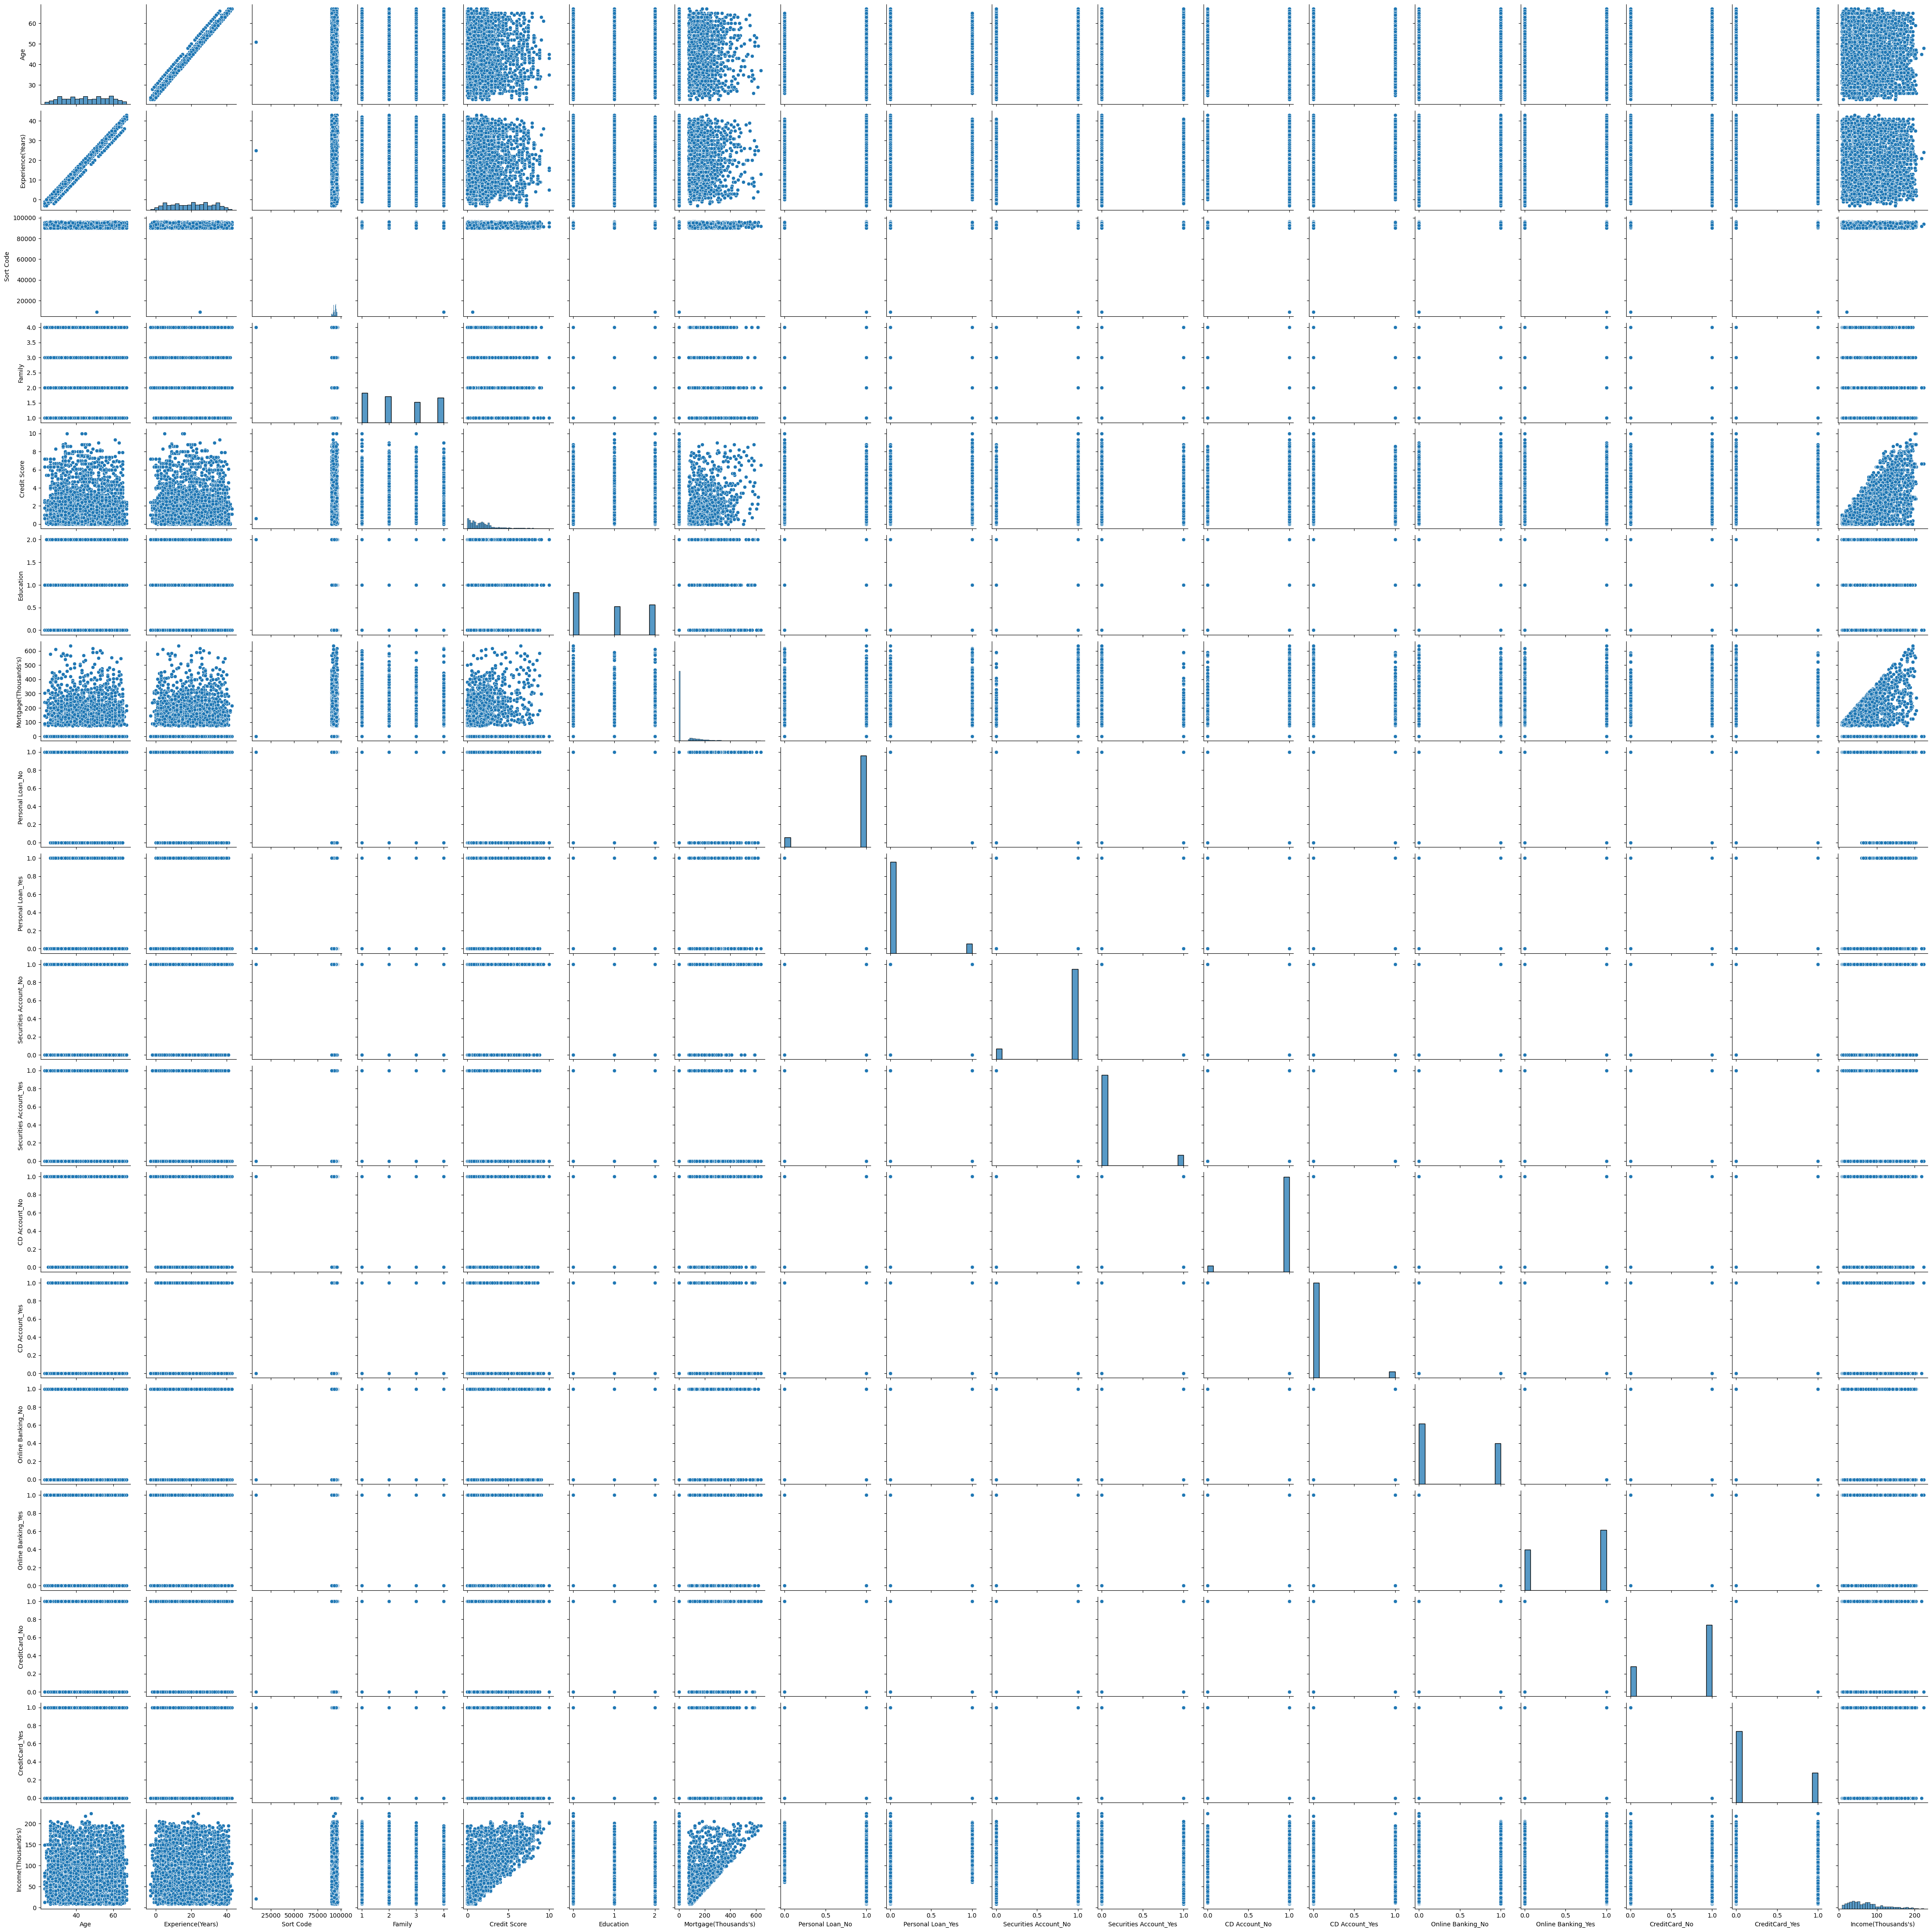

In [10]:
sns.pairplot(df_1);

Because the variables are not normally distributed, min-max normalization is applied to bring all values to the same order of magnitude. After being normalized, the data is split into four sets, i.e. predictor values for training, predictor values for testing, target values for training and target values for testing:

In [11]:
mm_sc = MinMaxScaler()
df_scaled = mm_sc.fit_transform(df_1)

mm_sc_rev = MinMaxScaler()
mm_sc_rev.scale_, mm_sc_rev.min_ = mm_sc.scale_[-1], mm_sc.min_[-1]

X = df_scaled[:, :-1]
y = df_scaled[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The block below builds two Neural Network models, each with a different optimizer. The first model uses Adaptive Moment Estimation (Adam), while the second uses Stochastic Gradient Descent (SGD):

In [12]:
nn_regressors = []

for opt in ['adam', 'SGD']:
    nn_regressor = Sequential()

    nn_regressor.add(Input(shape=(17,)))
    nn_regressor.add(Dense(units=17))
    nn_regressor.add(Dense(units=1))

    nn_regressor.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae','accuracy'])

    nn_results = nn_regressor.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))
    
    nn_regressors.append((nn_regressor, nn_results))

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0050 - loss: 0.2018 - mae: 0.3443 - val_accuracy: 0.0027 - val_loss: 0.0419 - val_mae: 0.1570
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0066 - loss: 0.0371 - mae: 0.1520 - val_accuracy: 0.0033 - val_loss: 0.0276 - val_mae: 0.1322
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0066 - loss: 0.0259 - mae: 0.1289 - val_accuracy: 0.0033 - val_loss: 0.0237 - val_mae: 0.1241
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0068 - loss: 0.0221 - mae: 0.1197 - val_accuracy: 0.0033 - val_loss: 0.0222 - val_mae: 0.1193
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0051 - loss: 0.0215 - mae: 0.1177 - val_accuracy: 0.0033 - val_loss: 0.0215 - val_mae: 0.1187
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0055 - loss: 0.0214 - mae: 0.1178 - val_accuracy: 0.0033 - val_loss: 0.0218 - val_mae: 0.1206
Epoch 7/100
110/110 ━━━━━━━━━━━━━━

Epoch 43/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0047 - loss: 0.0209 - mae: 0.1160 - val_accuracy: 0.0033 - val_loss: 0.0212 - val_mae: 0.1166
Epoch 44/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0059 - loss: 0.0202 - mae: 0.1130 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1162
Epoch 45/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0049 - loss: 0.0208 - mae: 0.1161 - val_accuracy: 0.0033 - val_loss: 0.0214 - val_mae: 0.1136
Epoch 46/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0053 - loss: 0.0203 - mae: 0.1144 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1157
Epoch 47/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0050 - loss: 0.0216 - mae: 0.1179 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1174
Epoch 48/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0061 - loss: 0.0210 - mae: 0.1162 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1169
Epoch 49/100
110/110 ━━━━━━━

Epoch 85/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0055 - loss: 0.0202 - mae: 0.1135 - val_accuracy: 0.0033 - val_loss: 0.0213 - val_mae: 0.1186
Epoch 86/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0068 - loss: 0.0207 - mae: 0.1151 - val_accuracy: 0.0033 - val_loss: 0.0208 - val_mae: 0.1154
Epoch 87/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0033 - loss: 0.0201 - mae: 0.1131 - val_accuracy: 0.0033 - val_loss: 0.0211 - val_mae: 0.1177
Epoch 88/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0070 - loss: 0.0207 - mae: 0.1153 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1165
Epoch 89/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0057 - loss: 0.0207 - mae: 0.1148 - val_accuracy: 0.0033 - val_loss: 0.0215 - val_mae: 0.1204
Epoch 90/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0071 - loss: 0.0206 - mae: 0.1145 - val_accuracy: 0.0033 - val_loss: 0.0209 - val_mae: 0.1139
Epoch 91/100
110/110 ━━━━━━━

Epoch 27/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0044 - loss: 0.0210 - mae: 0.1156 - val_accuracy: 0.0033 - val_loss: 0.0211 - val_mae: 0.1145
Epoch 28/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0053 - loss: 0.0209 - mae: 0.1146 - val_accuracy: 0.0033 - val_loss: 0.0217 - val_mae: 0.1208
Epoch 29/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0064 - loss: 0.0197 - mae: 0.1128 - val_accuracy: 0.0033 - val_loss: 0.0214 - val_mae: 0.1192
Epoch 30/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0066 - loss: 0.0199 - mae: 0.1138 - val_accuracy: 0.0033 - val_loss: 0.0211 - val_mae: 0.1162
Epoch 31/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0038 - loss: 0.0210 - mae: 0.1162 - val_accuracy: 0.0033 - val_loss: 0.0219 - val_mae: 0.1217
Epoch 32/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0060 - loss: 0.0206 - mae: 0.1149 - val_accuracy: 0.0033 - val_loss: 0.0211 - val_mae: 0.1149
Epoch 33/100
110/110 ━━━━━━━

Epoch 69/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0075 - loss: 0.0205 - mae: 0.1145 - val_accuracy: 0.0033 - val_loss: 0.0216 - val_mae: 0.1205
Epoch 70/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0056 - loss: 0.0205 - mae: 0.1149 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1159
Epoch 71/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0039 - loss: 0.0206 - mae: 0.1156 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1154
Epoch 72/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0065 - loss: 0.0208 - mae: 0.1155 - val_accuracy: 0.0033 - val_loss: 0.0212 - val_mae: 0.1176
Epoch 73/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0048 - loss: 0.0207 - mae: 0.1156 - val_accuracy: 0.0033 - val_loss: 0.0210 - val_mae: 0.1166
Epoch 74/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0061 - loss: 0.0208 - mae: 0.1136 - val_accuracy: 0.0033 - val_loss: 0.0211 - val_mae: 0.1148
Epoch 75/100
110/110 ━━━━━━━

The chart below shows a comparison of the two models' performance both during training and validation:

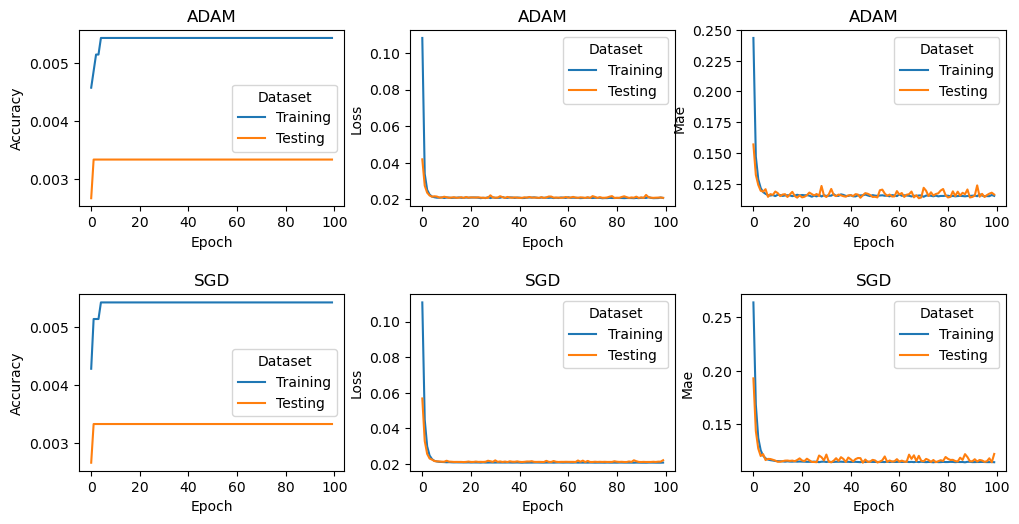

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
fig.tight_layout()

plt.subplots_adjust(wspace=0.25, hspace=0.5)

metrics = ['accuracy', 'loss', 'mae']

for i, ax in enumerate(axs.flat):
    j = 0
    
    if i > 2:
        i-=3
        j = 1
    
    ax.set_title(nn_regressors[j][0].optimizer.name.upper())
    
    sns.lineplot(data=pd.melt(pd.DataFrame({'Epoch': nn_regressors[j][1].epoch, 
                                            'Training': nn_regressors[j][1].history[metrics[i]],
                                            'Testing': nn_regressors[j][1].history[f'val_{metrics[i]}']}),
                              ['Epoch'],
                              var_name='Dataset',
                              value_name=metrics[i].capitalize()),
                 x='Epoch',
                 y=metrics[i].capitalize(),
                 hue='Dataset',
                 ax=ax);

From the chart above, both models performed very similarly. The Adam-based model has been chosen between the two due to it being an adaptive optimizer [(Giordano, 2020)](#(Giordano,-2020)):

In [14]:
nn_regressors[0][0].save('../models/nn_regressor.keras')

The block below builds the Linear Regression model:

In [15]:
lr_regressor = LinearRegression()

lr_results = lr_regressor.fit(X_train, y_train)

with open('../models/lr_regressor.pkl','wb') as f: pickle.dump(lr_regressor, f)

Once the models have been trained and saved, they can be loaded if needed:

In [16]:
nn_regressor = load_model('../models/nn_regressor.keras')
with open('../models/lr_regressor.pkl','rb') as f: lr_regressor = pickle.load(f)

The chart below helps compare the predictions made by each model on the same input data:

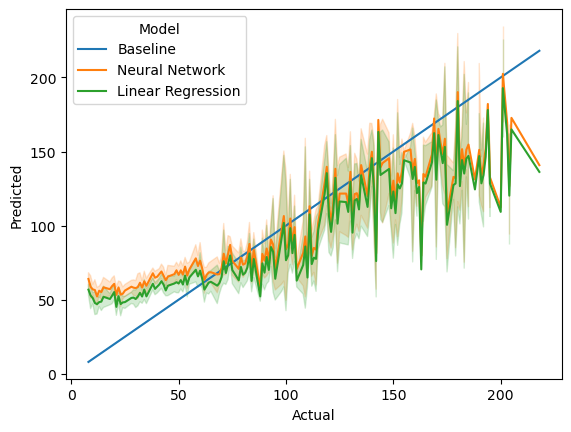

In [17]:
nn_pred = mm_sc_rev.inverse_transform(nn_regressors[1][0].predict(X_test, verbose=0).reshape(-1, 1)).reshape(-1)
lr_pred = mm_sc_rev.inverse_transform(lr_regressor.predict(X_test).reshape(-1, 1)).reshape(-1)
actual = mm_sc_rev.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

sns.lineplot(data=pd.melt(pd.DataFrame({'Actual': actual, 
                                        'Baseline': actual,
                                        'Neural Network': nn_pred,
                                        'Linear Regression': lr_pred}),
                          ['Actual'],
                          var_name='Model',
                          value_name='Predicted'),
             x='Actual',
             y='Predicted',
             hue='Model');

The chart above shows that, for this scenario, a Neural Network model and a Linear Regression model make very similar predictions.

The below are the predictions of the *Income(Thousands's)* for an unseen observation by both models:

In [18]:
def make_prediction(customer, encoders, scalers, regressors):
    customer = {k: [v] for k, v in customer.items() if k not in ['ID', 'Income(Thousands\'s)']}
    customer = pd.DataFrame(customer)
    customer.loc[:, ['Education']] = encoders[0].transform(customer.loc[:, ['Education']])

    encoded = encoders[1].transform(customer.iloc[:, 7:])

    for col in customer.columns[7:]:
        for val in ['No', 'Yes']:
            customer[f'{col}_{val}'] = np.nan

    customer.drop(columns=customer.columns[7:12], inplace=True)
    customer.iloc[:, 7:] = encoded

    customer['Income(Thousands\'s)'] = 0
    
    customer = scalers[0].transform(customer).reshape(-1)[:-1].reshape(1, -1)
    
    predictions = [scalers[1].inverse_transform(regressors[0].predict(customer, verbose=0).reshape(-1, 1))[0][0]]
    predictions.append(scalers[1].inverse_transform(regressors[1].predict(customer).reshape(-1, 1))[0][0])
    
    return predictions

new_customer = {'Age': 29,
                'Experience(Years)': 0,
                'Sort Code': 90000,
                'Family': 1,
                'Credit Score': 1.5,
                'Education': 'Degree',
                'Mortgage(Thousands\'s)': 0,
                'Personal Loan': 'No',
                'Securities Account': 'No',
                'CD Account': 'No',
                'Online Banking': 'Yes',
                'CreditCard': 'No'}

preds = make_prediction(new_customer, [ordinal_enc, onehot_enc], [mm_sc, mm_sc_rev], [nn_regressor, lr_regressor])

print("New customer's Income (Thousands's):\n")
print(f"--> Neural Network: {preds[0]}.")
print(f"--> Linear Regression: {preds[1]}.")

New customer's Income (Thousands's):

--> Neural Network: 68.12077331542969.
--> Linear Regression: 68.75.


### Semantic Analysis

In this section, a [**Neural Network (NN)**]() model is trained for **Sentiment Analysis** on the [TweetCollection.csv](data/TweetCollection.csv) dataset. The original dataset was sourced by [Shrivastava (2021)](#(Shrivastava,-2021)) and is available under the filename *test.csv*. After being trained, the model is tested against another dataset of social media posts, the [SocialMediaCollection.csv]() dataset, originally sourced as *sentimentdataset.csv* by [Parmar (2023)](#(Parmar,-2023)).

The code below imports all the necessary packages and modules:

In [19]:
import re
import nltk
import string
import importlib

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from keras import Sequential, Input
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout

Next, the dataset is imported into a pandas dataframe. The dataframe has 4,815 observations and 9 variables:

In [20]:
df_2 = pd.read_csv('../data/TweetCollection.csv', encoding='iso-8859-1')
df_2

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The below shows that the dataset contains missing values for 1,281 (i.e. 4,815 - 3,534) of its entries and that, out of the 9 variables, 3 are numeric and 6 are objects:

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


The next code block completely removes all columns but *text* and *sentiment*, while also dropping any rows that contain *NaN* values. Since the analysis to be carried out is purely semantic, the removed variables were superfluous:

In [22]:
df_2 = df_2.iloc[:, 1:3].dropna()
df_2

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


The next block reveals the range of values for the *sentiment* variable:

In [23]:
df_2['sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

The chart below shows the distribution of the *sentiment* variable in the dataset:

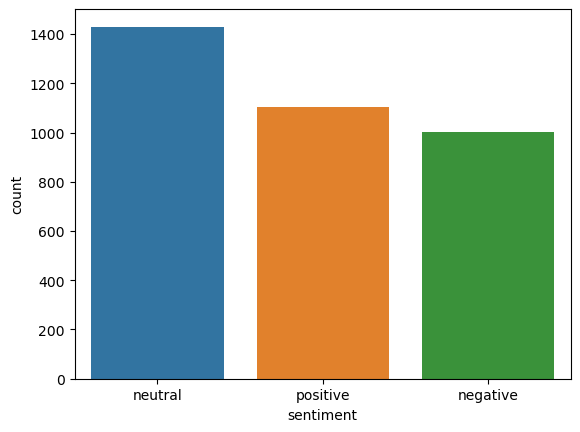

In [24]:
sns.countplot(data=df_2, x='sentiment', hue='sentiment');

To address the imbalance seen above, the code below selects samples of 1,200 observations out of each category (note that while *neutral* is undersampled, *positive* and *negative* are oversampled):

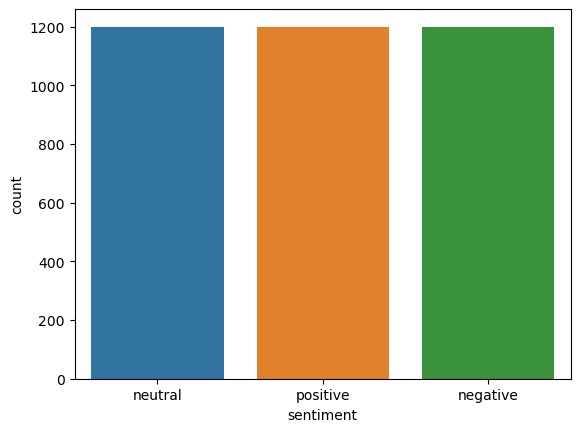

In [25]:
for sentiment in df_2['sentiment'].unique():
    sample = df_2[df_2['sentiment'] == sentiment].sample(1200, replace=True)
    df_2.drop(df_2[df_2['sentiment'] == sentiment].index, inplace=True)
    df_2 = pd.concat([df_2, sample], axis=0)

sns.countplot(data=df_2, x='sentiment', hue='sentiment');

In semantic analysis, punctuation and stopwords are considered noise. Therefore, the next block of code filters out said noise from the *text* variable:

In [26]:
def get_text_processing(text):
    try:
        nltk.data.find('corpora/stopwords')
    except:
        nltk.download('stopwords')
        importlib.reload(nltk)
    
    stpword = nltk.corpus.stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

df_2['text'] = df_2['text'].apply(get_text_processing)
df_2

,text,sentiment
2815,yay playing scattegories random Joel May Sherman,neutral
1404,12AM still sending much tweets Philippines tou...,neutral
1309,cant,neutral
827,got paycheck April bonus b deposited 2day rest...,neutral
1606,Trying find someone go mall,neutral
...,...,...
3531,know mean little dog sinking depression wants ...,negative
1778,got fight ryan hes like crying im dead inside ...,negative
1963,cant sleep darn frustrating,negative
772,Hiya Missed,negative


Because the algorithm used requires numeric data, both variables, which are categorical, need to be converted. The block below encodes the variable *sentiment* using the one-hot encoding technique:

In [27]:
one_hot = pd.get_dummies(df_2["sentiment"], dtype=float)

df_2.drop(["sentiment"], axis=1, inplace=True)

df_2 = pd.concat([df_2, one_hot], axis=1)
df_2

,text,negative,neutral,positive
2815,yay playing scattegories random Joel May Sherman,0.0,1.0,0.0
1404,12AM still sending much tweets Philippines tou...,0.0,1.0,0.0
1309,cant,0.0,1.0,0.0
827,got paycheck April bonus b deposited 2day rest...,0.0,1.0,0.0
1606,Trying find someone go mall,0.0,1.0,0.0
...,...,...,...,...
3531,know mean little dog sinking depression wants ...,1.0,0.0,0.0
1778,got fight ryan hes like crying im dead inside ...,1.0,0.0,0.0
1963,cant sleep darn frustrating,1.0,0.0,0.0
772,Hiya Missed,1.0,0.0,0.0


After encoding the target categories, the *text* variable is vectorized and normalized using TF-IDF:

In [28]:
vect = CountVectorizer()
tfidf = TfidfTransformer()

X = tfidf.fit_transform(vect.fit_transform(df_2["text"].values)).toarray()
y = df_2.drop("text", axis=1).values

Next, the data is split into four sets, i.e. predictor values for training, predictor values for testing, target values for training and target values for testing:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The block below builds the Neural Network model:

In [30]:
nn_sentiment = Sequential()

nn_sentiment.add(Dense(units=12673, activation="relu"))
nn_sentiment.add(Dropout(0.5))
nn_sentiment.add(Dense(units=4000, activation="relu"))
nn_sentiment.add(Dropout(0.5))
nn_sentiment.add(Dense(units=500, activation="relu"))
nn_sentiment.add(Dropout(0.5))
nn_sentiment.add(Dense(units=3, activation="softmax"))

nn_sentiment.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=2)

nn_sentiment.fit(x=X_train,
                 y=y_train,
                 batch_size=256,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 verbose=1,
                 callbacks=early_stop)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 92s 8s/step - accuracy: 0.3747 - loss: 1.0827 - val_accuracy: 0.7000 - val_loss: 0.7896
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 138s 8s/step - accuracy: 0.8575 - loss: 0.4837 - val_accuracy: 0.7806 - val_loss: 0.6713
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.9845 - loss: 0.0544 - val_accuracy: 0.8074 - val_loss: 0.7404
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.8009 - val_loss: 0.8419
Epoch 4: early stopping


The block below shows the accuracy score of the trained model:

In [31]:
model_score = nn_sentiment.evaluate(X_test, y_test, batch_size=64, verbose=1)
print("Test accuracy:", model_score[1])

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.8055 - loss: 0.7995
Test accuracy: 0.8009259104728699


Once the model has been trained and evaluated, it can be saved and loaded if it needed:

In [32]:
nn_sentiment.save('../models/nn_sentiment.keras')
nn_sentiment = load_model('../models/nn_sentiment.keras')

In order to test the model against unseen data, a different dataset is loaded:

In [33]:
df_3 = pd.read_csv('../data/SocialMediaCollection.csv')
df_3.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


The code below keeps only the variables *Text* and *Sentiment* in the dataset:

In [34]:
df_3 = df_3.iloc[:, 2:4]
df_3

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


The below reveals the range of values for the variable *Sentiment*:

In [35]:
df_3.loc[:, 'Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

From the above it can be seen that this dataset's texts are classified into many categories that the model was not trained to predict. Therefore, any observations not classified as either *Negative*, *Neutral* or *Positive* is dropped. Additionally, the categories that were kept had leading/trailing whitespaces removed:

In [36]:
df_3['Sentiment'] = df_3['Sentiment'].apply(lambda x: x.strip()).apply(lambda x: x.strip())
df_3 = df_3.loc[df_3['Sentiment'].isin(['Negative', 'Neutral', 'Positive'])]
df_3 = df_3.reset_index()
df_3

,index,Text,Sentiment
0,0,Enjoying a beautiful day at the park! ...,Positive
1,1,Traffic was terrible this morning. ...,Negative
2,2,Just finished an amazing workout! 💪 ...,Positive
3,3,Excited about the upcoming weekend getaway! ...,Positive
4,4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...,...
62,713,Participating in a science fair to showcase a ...,Neutral
63,714,Attending a workshop on time management to enh...,Neutral
64,715,Volunteering at a local charity event to give ...,Neutral
65,716,Collaborating on a group project to promote te...,Neutral


The next block of code processes the texts in the *Text* variable to remove noise:

In [37]:
df_3['Text'] = df_3['Text'].apply(get_text_processing)
df_3

,index,Text,Sentiment
0,0,Enjoying beautiful day park,Positive
1,1,Traffic terrible morning,Negative
2,2,finished amazing workout 💪,Positive
3,3,Excited upcoming weekend getaway,Positive
4,4,Trying new recipe dinner tonight,Neutral
...,...,...,...
62,713,Participating science fair showcase unique exp...,Neutral
63,714,Attending workshop time management enhance org...,Neutral
64,715,Volunteering local charity event give back com...,Neutral
65,716,Collaborating group project promote teamwork s...,Neutral


The next code block makes predictions on both the validation data and the new unseen data. Both classification performances are shown as confusion matrices, where it can be seen that the model does not perform nearly as well on input from the new dataset:

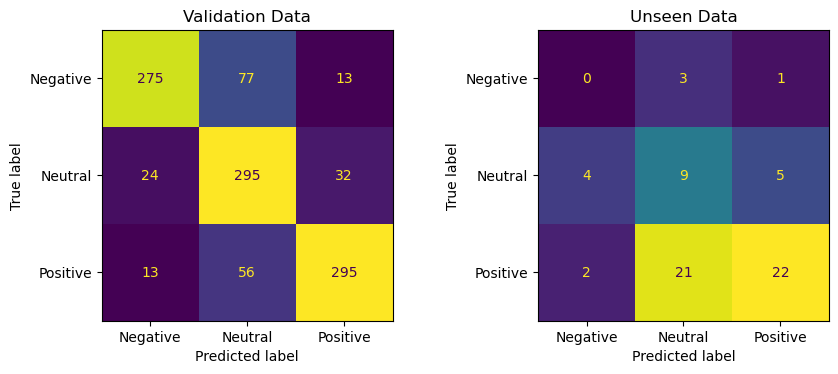

In [82]:
labels = ['Negative', 'Neutral', 'Positive']
titles = ['Validation Data', 'Unseen Data']

y_pred_1 = [labels[np.argmax(pred)] for pred in nn_sentiment.predict(X_test, verbose=0)]
y_true_1 = [labels[np.argmax(true)] for true in y_test]

y_true_2 = []
y_pred_2 = []

for i, text in enumerate(df_3['Text']):
    y_true_2.append(df_3['Sentiment'][i])
    
    y_pred_2.append(labels[np.argmax(nn_sentiment.predict(tfidf.transform(
        vect.transform([text])).toarray(), verbose=0).reshape(-1))])

cm = [confusion_matrix(y_true_1, y_pred_1, labels=labels),
      confusion_matrix(y_true_2, y_pred_2, labels=labels)]

fig, axs = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout()
plt.subplots_adjust(wspace=0.5)

for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ConfusionMatrixDisplay(confusion_matrix=cm[i], display_labels=labels).plot(ax=ax, colorbar=False);

### References

<span id="(Giordano,-2020)">Giordano, D. (2020) *7 tips to choose the best optimizer*. Medium. Available at: https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e (Accessed: 29 May 2024).</span>

<span id="(Parmar,-2023)">Parmar, K. (2023) *Social Media Sentiments Analysis Dataset*. Kaggle. Available at: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset (Accessed: 28 May 2024).</span>

<span id="(Shrivastava,-2021)">Shrivastava, A. (2021) *Sentiment Analysis Dataset*. Kaggle. Available at: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset (Accessed: 28 May 2024).</span>